Data Pre-Processing and Preparing

In [4]:
from data_preprocessing import xml_to_df
from global_parameters import LABELS_MAP_SVM
from data_preparing import split_data


xml_files = ["NEJM_data.xml", "animals_data.xml"]
data_path = "../data-querying/results/"
max_size = 10000

hum_df, vet_df = xml_to_df(data_path, xml_files, labels_map=LABELS_MAP_SVM)
train_set, val_set, test_set = split_data(hum_df, vet_df, max_size)

train_set["title_abstract"] = train_set[["title", "abstract"]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
val_set["title_abstract"] = val_set[["title", "abstract"]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
test_set["title_abstract"] = test_set[["title", "abstract"]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

  8%|▊         | 2123/26780 [00:00<00:02, 10886.89it/s]

Processing medical field: human_medicine


 49%|████▉     | 13175/26780 [00:01<00:01, 12700.92it/s]

Processing medical field: veterinary_medicine


100%|██████████| 26780/26780 [00:03<00:00, 8502.95it/s] 


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

train_x = vectorizer.fit_transform(train_set["title_abstract"])
train_y = train_set["labels"]

val_x = vectorizer.transform(val_set["title_abstract"])
val_y = val_set["labels"]

test_x = vectorizer.transform(test_set["title_abstract"])
test_y = test_set["labels"]

In [6]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

lsvc = LinearSVC(verbose=0)

lsvc.fit(train_x, train_y)

score = lsvc.score(train_x, train_y)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, train_x, train_y, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

c:\Users\albbl\Documents\Studium\11_Semester\medtextclassification_repo\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score:  1.0


c:\Users\albbl\Documents\Studium\11_Semester\medtextclassification_repo\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\albbl\Documents\Studium\11_Semester\medtextclassification_repo\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\albbl\Documents\Studium\11_Semester\medtextclassification_repo\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\albbl\Documents\Studium\11_Semester\medtextclassification_repo\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarnin

CV average score: 1.00


c:\Users\albbl\Documents\Studium\11_Semester\medtextclassification_repo\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [7]:
from sklearn.metrics import confusion_matrix, classification_report

pred_y = lsvc.predict(test_x)

cm = confusion_matrix(test_y, pred_y)
print(cm)

cr = classification_report(test_y, pred_y)
print(cr) 

[[994   6]
 [  1 999]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1000
           1       0.99      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



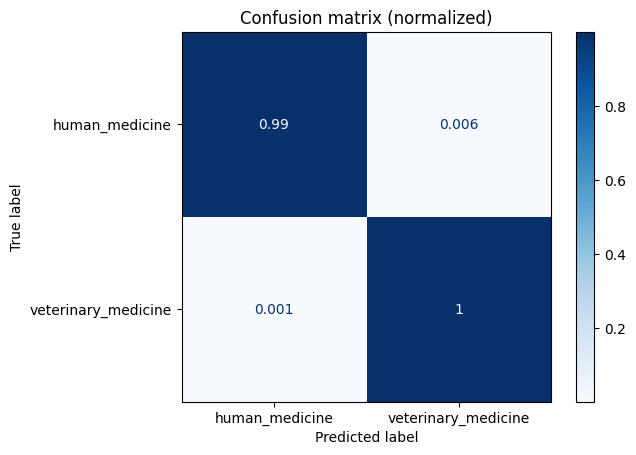

In [8]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


labels = list(LABELS_MAP_SVM.keys())
test_classes = [labels[0] if label == 0 else labels[1] for label in test_y]
preds_classes = [labels[0] if label == 0 else labels[1] for label in pred_y]
disp = ConfusionMatrixDisplay.from_predictions(test_classes, preds_classes, labels=labels, normalize="true", cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix (normalized)")
plt.show()